In [2]:
# %matplotlib inline
import pandas as pd #Pandas para usar dataframes
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico

In [5]:
stock_data = pd.read_csv("dataset_clustering_teorico.csv")
stock_data

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,Bank of America,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,British American Tobacco,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,Canon,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,Caterpillar,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,Colgate-Palmolive,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [6]:
stock_data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 964 entries, Unnamed: 0 to 2013-10-29
dtypes: float64(963), object(1)
memory usage: 452.0+ KB


In [9]:
stock_data.isnull().sum()

Unnamed: 0    0
2010-01-04    0
2010-01-05    0
2010-01-06    0
2010-01-07    0
             ..
2013-10-23    0
2013-10-24    0
2013-10-25    0
2013-10-28    0
2013-10-29    0
Length: 964, dtype: int64

<AxesSubplot:>

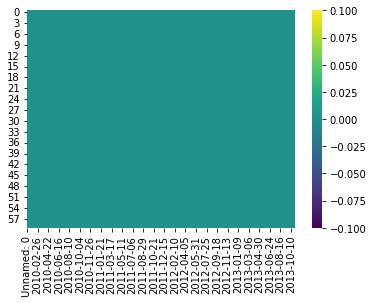

In [7]:
sns.heatmap(stock_data.isnull(), cmap = "viridis")

In [10]:
stock_data.columns

Index(['Unnamed: 0', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22',
       '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29'],
      dtype='object', length=964)

In [8]:
stock_data.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948
